In [ ]:
print("HEllo")

In [1]:
print("hi")

hi


In [3]:
from datasets import load_dataset
import matplotlib.pyplot as plt

In [5]:
dataset = load_dataset('lukebarousse/data_jobs')



In [7]:
df = dataset['train'].to_pandas()

In [10]:

import pandas as pd
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')


In [12]:
df.iloc[0:10]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [15]:
df['salary_year_avg'].median()

np.float64(115000.0)

In [18]:
print(df['salary_hour_avg'].median())

45.97999954223633


In [22]:
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [20]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [27]:
df.pivot_table(index='job_title_short', values='salary_year_avg', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [31]:
df.pivot_table(index='job_country', values='salary_year_avg', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [40]:
Top_countries= df['job_country'].value_counts().head(6).index
Top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

<Axes: xlabel='job_country'>

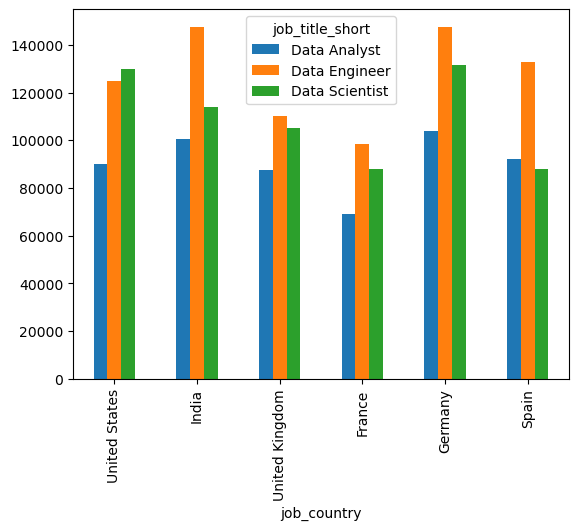

In [60]:
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salary = df_job_country_salary.loc[Top_countries]
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary.plot(kind='bar')

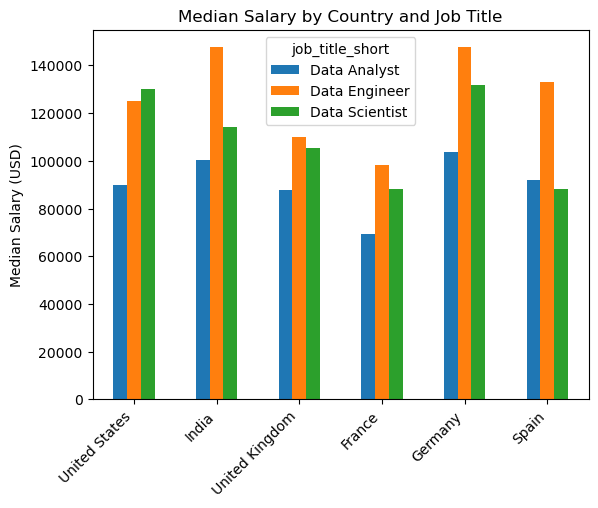

In [64]:
df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary (USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

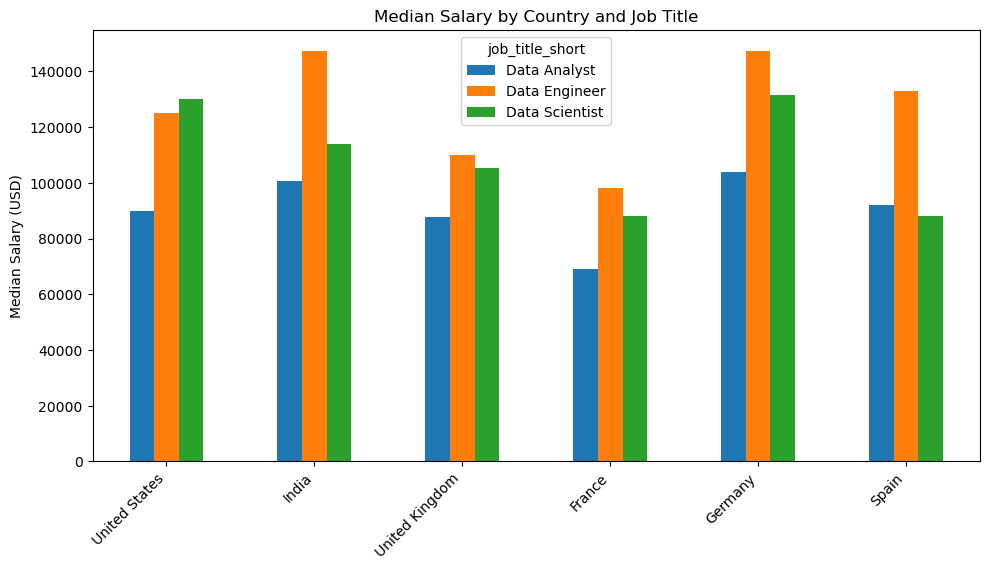

In [66]:
df_job_country_salary.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.xlabel('')
plt.show()


In [70]:
df_UK = df[df['job_country']== 'United Kingdom'].copy()
df_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
15,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"['python', 'sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':..."
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"['sql', 'python']","{'programming': ['sql', 'python']}"
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"['sql', 'r', 'python', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"['react', 'docker']","{'libraries': ['react'], 'other': ['docker']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785485,Data Analyst,Data Quality Analyst,Anywhere,via LinkedIn,Full-time,True,United Kingdom,2023-10-04 06:09:44,False,False,United Kingdom,None,NaN,NaN,Viatris,"['sql', 'sql server', 'excel', 'powerpoint']","{'analyst_tools': ['excel', 'powerpoint'], 'da..."
785513,Data Scientist,Data Scientist,"Glasgow, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:21,False,False,United Kingdom,None,NaN,NaN,ASA Recruitment,"['r', 'power bi']","{'analyst_tools': ['power bi'], 'programming':..."
785522,Data Engineer,Lead Data Engineer,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-19 06:16:45,True,False,United Kingdom,None,NaN,NaN,bionic-services-ltd,"['sql', 'python', 'sql server', 'aws', 'snowfl...","{'analyst_tools': ['ssis'], 'cloud': ['aws', '..."
785642,Data Engineer,Submission for the position: Data Engineer Sen...,"England, UK",via BAE Systems - Talentify,Full-time,False,United Kingdom,2023-01-02 06:31:23,True,False,United Kingdom,None,NaN,NaN,BAE Systems - UK,"['python', 'vue', 'ssis', 'ssrs', 'qlik', 'con...","{'analyst_tools': ['ssis', 'ssrs', 'qlik'], 'a..."


In [72]:
df_UK['job_posted_month'] = df_UK['job_posted_date'].dt.strftime('%B')
df_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
15,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"['python', 'sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",October
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"['sql', 'python']","{'programming': ['sql', 'python']}",May
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"['sql', 'r', 'python', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",November
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None,December
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"['react', 'docker']","{'libraries': ['react'], 'other': ['docker']}",December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785485,Data Analyst,Data Quality Analyst,Anywhere,via LinkedIn,Full-time,True,United Kingdom,2023-10-04 06:09:44,False,False,United Kingdom,None,NaN,NaN,Viatris,"['sql', 'sql server', 'excel', 'powerpoint']","{'analyst_tools': ['excel', 'powerpoint'], 'da...",October
785513,Data Scientist,Data Scientist,"Glasgow, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:21,False,False,United Kingdom,None,NaN,NaN,ASA Recruitment,"['r', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",January
785522,Data Engineer,Lead Data Engineer,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-19 06:16:45,True,False,United Kingdom,None,NaN,NaN,bionic-services-ltd,"['sql', 'python', 'sql server', 'aws', 'snowfl...","{'analyst_tools': ['ssis'], 'cloud': ['aws', '...",January
785642,Data Engineer,Submission for the position: Data Engineer Sen...,"England, UK",via BAE Systems - Talentify,Full-time,False,United Kingdom,2023-01-02 06:31:23,True,False,United Kingdom,None,NaN,NaN,BAE Systems - UK,"['python', 'vue', 'ssis', 'ssrs', 'qlik', 'con...","{'analyst_tools': ['ssis', 'ssrs', 'qlik'], 'a...",January


In [132]:
df_UK_Pivot = df_UK.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_UK_Pivot.reset_index(inplace=True)
df_UK_Pivot['Month_no'] =pd.to_datetime(df_UK_Pivot['job_posted_month'], format='%B').dt.month

df_UK_Pivot['Month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: Month_no, dtype: int32

In [135]:
df_UK_Pivot.sort_values('Month_no', inplace=True)

In [142]:
df_UK_Pivot.set_index('job_posted_month')
df_UK_Pivot.drop(columns='Month_no', inplace=True)

KeyError: "None of ['job_posted_month'] are in the columns"

In [143]:
df_UK_Pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


<Axes: xlabel='job_posted_month'>

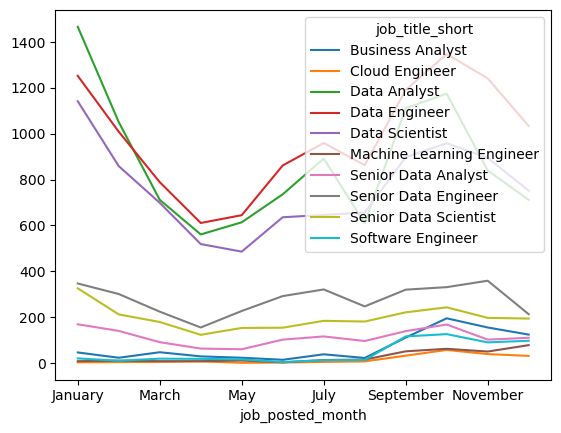

In [159]:
df_UK_Pivot.plot(kind='line')

In [154]:
Top_5= df_UK['job_title_short'].value_counts().head(5)

In [157]:
Top_5.index.tolist()

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [161]:
Top_5 = df_UK['job_title_short'].value_counts().head(5).index.tolist()


In [162]:
Top_5

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [163]:
Top_5 = [col for col in Top_5 if col in df_UK_Pivot.columns]


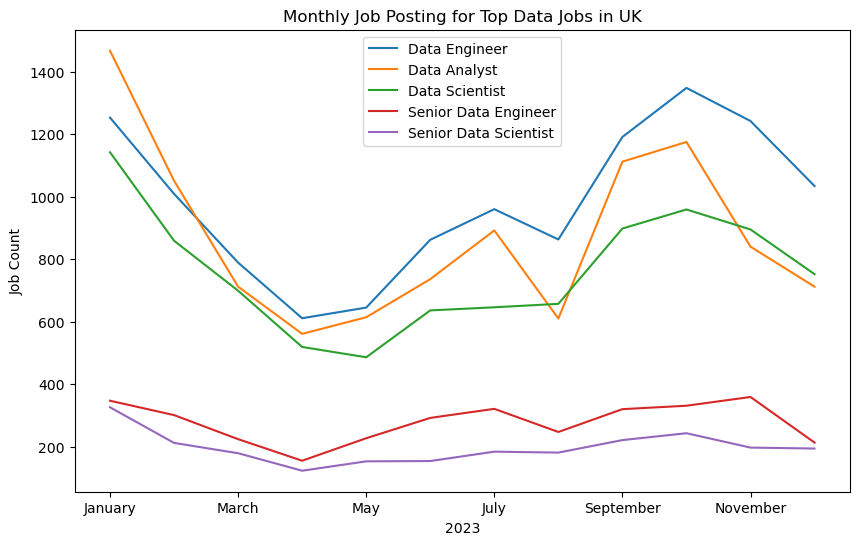

In [174]:
df_UK_Pivot[Top_5].plot(kind='line', figsize=(10,6))
plt.ylabel('Job Count')
plt.xlabel('2023')
plt.title('Monthly Job Posting for Top Data Jobs in UK')
plt.legend()
plt.show()


In [179]:
df_UK_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
df_UK_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [181]:
df_UK_merged=df_UK_Pivot.merge(df_UK_software_pivot, on="job_posted_month")

In [192]:
topp_5=(df_UK_merged.sum()
        .sort_values(ascending=False)
        .head()
        .index
        .to_list())
topp_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

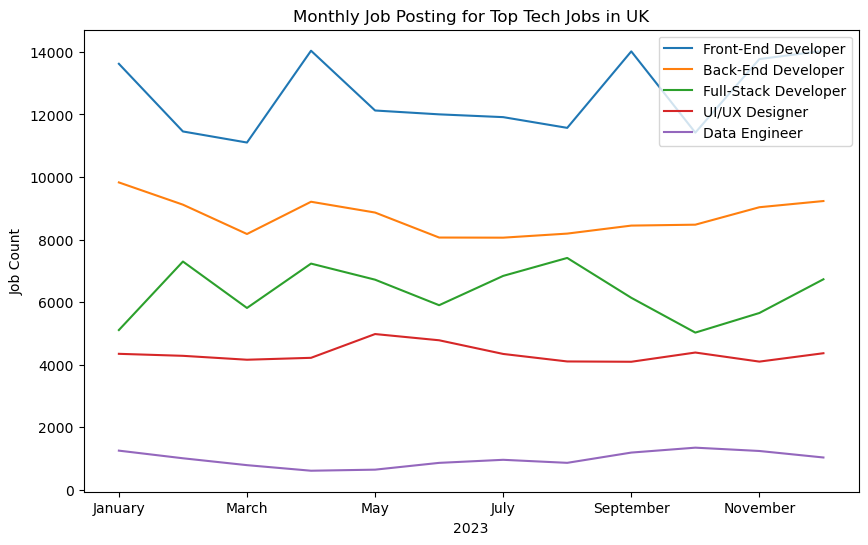

In [197]:

df_UK_merged[topp_5].plot(kind='line', figsize=(10,6))
plt.ylabel('Job Count')
plt.ylim=(0, 20000)
plt.xlabel('2023')
plt.title('Monthly Job Posting for Top Tech Jobs in UK')
plt.legend()
plt.show()

In [210]:
#calculating salary projection for next year
df_salary = df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

def projected_salary(salary):
    return salary * 1.03



In [225]:
df_salary = df[pd.notna(df['salary_year_avg'])][['salary_year_avg']].copy()

def projected_salary(salary):
    return salary * 1.03

In [221]:
df_salary['salary_year_avg'].apply(projected_salary)


28        112785.00
77        144200.00
92        123600.00
100       235068.66
109        91670.00
            ...    
785624    143392.48
785641    154500.00
785648    228531.25
785682    162225.00
785692    162225.00
Name: salary_year_avg, Length: 22003, dtype: float64

In [227]:
df_salary = df[pd.notna(df['salary_year_avg'])][['salary_year_avg']].copy()

def projected_salary(salary):
    return salary * 1.03

df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(projected_salary)

df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [235]:
import ast

df['job_skills'] = df['job_skills'].apply(
    lambda x: [] if x is None else ast.literal_eval(x) if isinstance(x, str) else x
)


In [236]:
df['job_skills'].apply(type).value_counts()


job_skills
<class 'list'>    785741
Name: count, dtype: int64

In [241]:
type(df['job_skills'][1])

list

In [242]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,[]
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [248]:
df_exploded =df.explode('job_skills')

In [286]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
type(skills_count)

pandas.core.series.Series

In [287]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
45,Business Analyst,digitalocean,1
2241,Software Engineer,visualbasic,1
29,Business Analyst,codecommit,1
24,Business Analyst,chainer,1


In [290]:
df_skills_count['job_title_short'].value_counts()


job_title_short
Data Engineer                239
Software Engineer            239
Data Scientist               237
Data Analyst                 235
Senior Data Engineer         226
Business Analyst             223
Machine Learning Engineer    222
Senior Data Scientist        215
Cloud Engineer               213
Senior Data Analyst          207
Name: count, dtype: int64

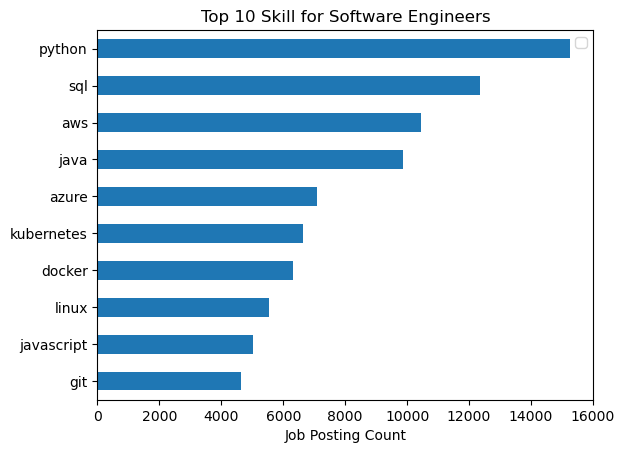

In [307]:
job_title = 'Software Engineer'
top_skills = 10

df_skills_final = (
    df_skills_count[df_skills_count['job_title_short'] == job_title]
    .sort_values('skill_count', ascending=False)
    .head(top_skills)
)
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skill for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend('')
plt.show()


